In [2]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

#replaced blanks with 0 as tenure is 0 and no total charges are recorded

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df["customerID"].duplicated().sum()

np.int64(0)

In [11]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

#coneverted 0 annd 1 value of senior citizen to yes/no to make it easier to understand

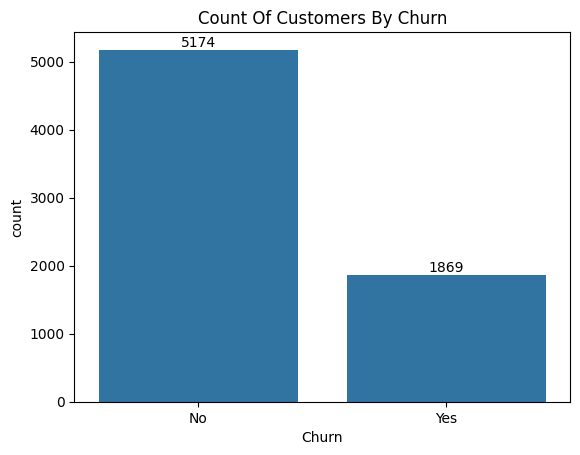

In [16]:
ax =sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title('Count Of Customers By Churn')
plt.show()

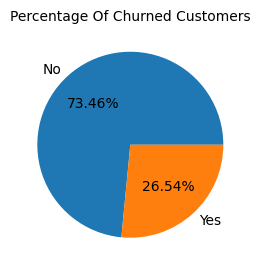

In [17]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title('Percentage Of Churned Customers',fontsize=10)
plt.show()

#From the given piechar we can conclude that 26.54% of our customers have churned out.
#Now let's explore the reason behind it

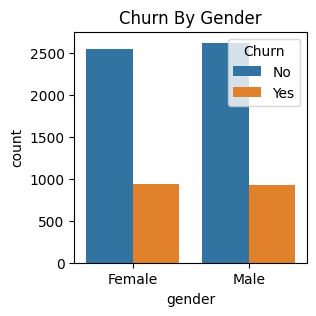

In [18]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender",data=df,hue='Churn')
plt.title('Churn By Gender')
plt.show()

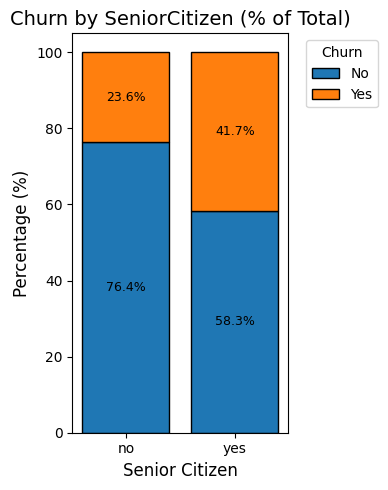

In [20]:


#Aggregate data
grouped_data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

#Calculate percentages
total_counts = grouped_data.groupby('SeniorCitizen')['Count'].transform('sum')
grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

# Pivot data for plotting
pivot_data = grouped_data.pivot(index='SeniorCitizen', columns='Churn', values='Percentage').fillna(0)

#Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(4, 5))
bars = []
bottom = [0] * pivot_data.shape[0]

for churn_label in pivot_data.columns:
    bar = ax.bar(
        pivot_data.index,
        pivot_data[churn_label],
        bottom=bottom,
        label=churn_label,
        edgecolor='black'
    )
    bars.append(bar)
    bottom += pivot_data[churn_label]

#Adding percentage labels
for bar_group, churn_label in zip(bars, pivot_data.columns):
    for bar, percentage in zip(bar_group, pivot_data[churn_label]):
        if percentage > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

# Add labels, title, legend
ax.set_title('Churn by SeniorCitizen (% of Total)', fontsize=14)
ax.set_xlabel('Senior Citizen', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticks(pivot_data.index)
ax.set_xticklabels(pivot_data.index, fontsize=10)
ax.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

#Comparative a greated percentage of people in senior citizen category have churned

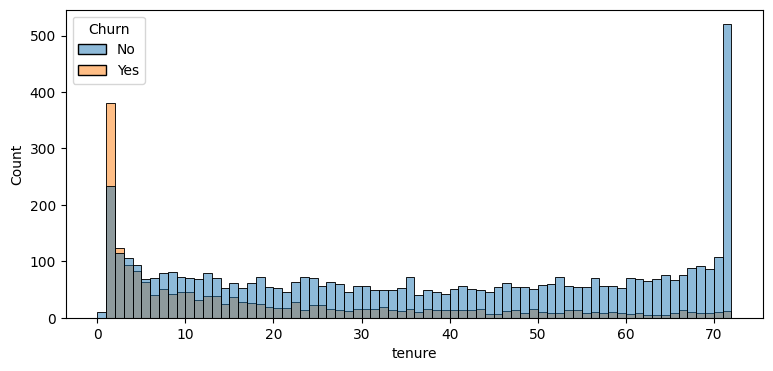

In [21]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

#People who have used our services for a long time and people who have used our services one or two months have churned

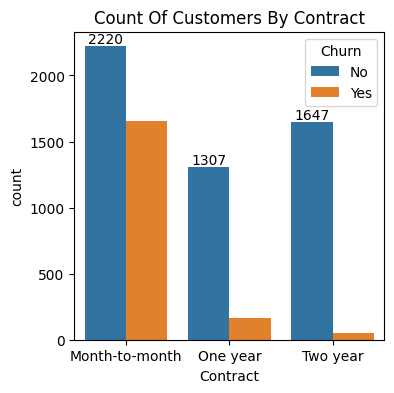

In [22]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title('Count Of Customers By Contract')
plt.show()

#People who have month to month contrcat are like to churn from them who have 1 or 2 years of contract

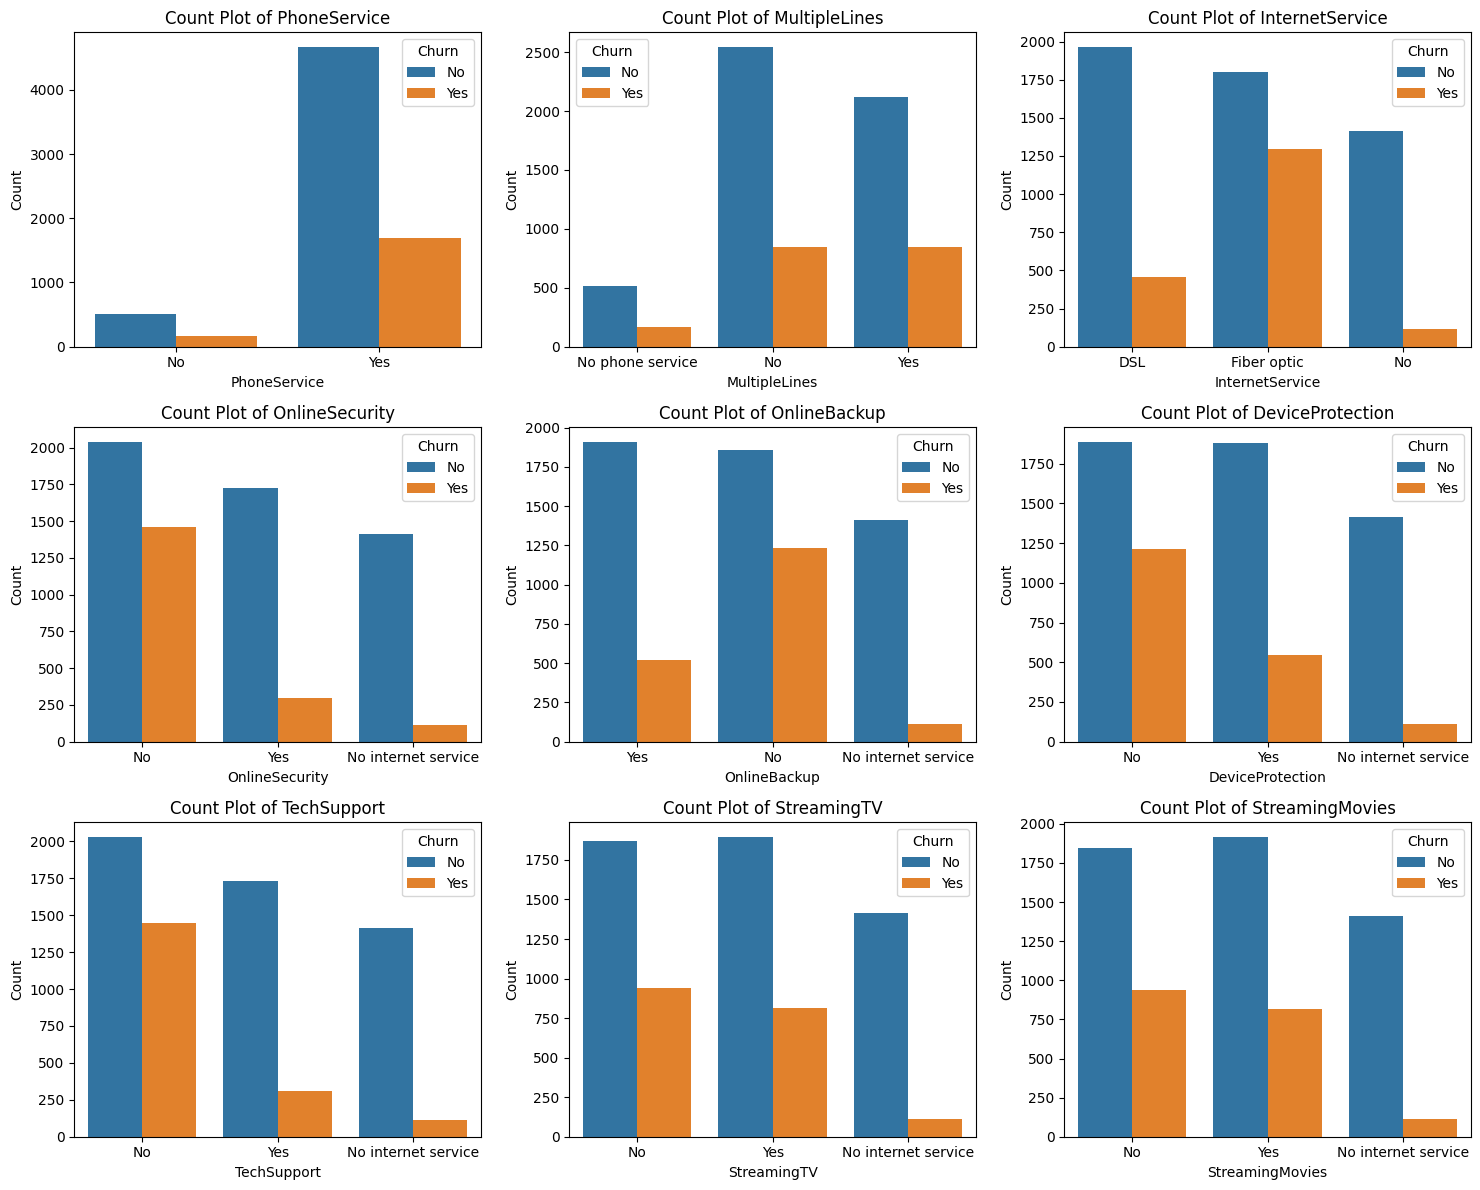

In [26]:
# List of columns for which we want to create count plots
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#The majority of customers who do not churn tend to have services like phoneservice,internetservice(particularly DSL)and online security enabled.For services like onlinebackuptechsupport and streamingTV,churn rates are noticeably higher when these services are not used or unavailable.

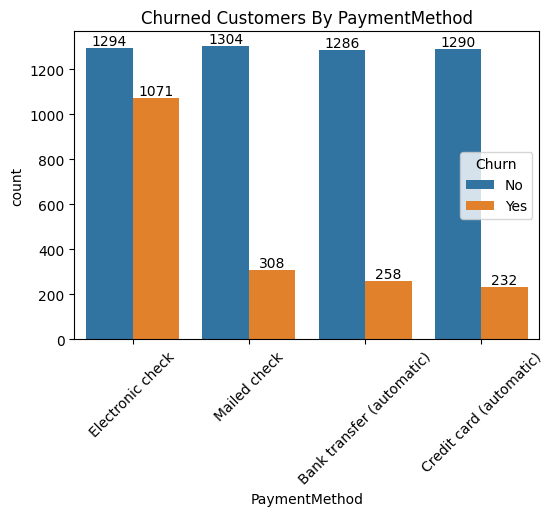

In [27]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Customers By PaymentMethod')
plt.xticks(rotation=45)
plt.show()

 #Customer is likely to churn more when he is using electronic check as a payment method